In [1]:
import numpy                    as np
import pandas                   as pd
import matplotlib.pyplot        as plt
import seaborn                  as sns
import tensorflow               as tf
import tensorflow.keras.backend as K
from tensorflow                 import keras

## 데이터세트 불러오기

In [2]:
NoOfData = pd.read_csv('Data/NoOfData.csv', index_col=0)
NoOfData

,ATR,Trans
0c (Fast),25,27
120c (Fast),23,23
180c (Fast),20,20
0c (Slow),23,25
120c (Slow),23,24
180c (Slow),20,19
Sum x 2,268,276


In [3]:
Num_ATR_0c     = 2 * (NoOfData.iloc[0,0] + NoOfData.iloc[3,0])
Num_ATR_120c   = 2 * (NoOfData.iloc[1,0] + NoOfData.iloc[4,0])
Num_ATR_180c   = 2 * (NoOfData.iloc[2,0] + NoOfData.iloc[5,0])

print("ATR   데이터 - 0cycle:  %d 개 , 120cycle: %d 개 , 180cycle: %d 개"%(Num_ATR_0c  , Num_ATR_120c  , Num_ATR_180c ))

ATR   데이터 - 0cycle:  96 개 , 120cycle: 92 개 , 180cycle: 80 개


In [4]:
ATR_SG_0D = np.array(pd.read_csv('Data/ATR/SG_ATR_0D', header=None))
ATR_SG_1D = np.array(pd.read_csv('Data/ATR/SG_ATR_1D', header=None))
ATR_SG_2D = np.array(pd.read_csv('Data/ATR/SG_ATR_2D', header=None))

ATR_SG_0D = ATR_SG_0D.reshape(ATR_SG_0D.shape[0] , ATR_SG_0D.shape[1], 1)
ATR_SG_1D = ATR_SG_1D.reshape(ATR_SG_1D.shape[0] , ATR_SG_1D.shape[1], 1)
ATR_SG_2D = ATR_SG_2D.reshape(ATR_SG_2D.shape[0] , ATR_SG_2D.shape[1], 1)

print(ATR_SG_0D.shape, ATR_SG_1D.shape, ATR_SG_2D.shape)

(268, 1739, 1) (268, 1739, 1) (268, 1739, 1)


In [5]:
ATR_0c_label   = np.zeros((Num_ATR_0c   , 3))
ATR_120c_label = np.zeros((Num_ATR_120c , 3))
ATR_180c_label = np.zeros((Num_ATR_180c , 3))

ATR_0c_label[:]   = [1,0,0]
ATR_120c_label[:] = [0,1,0]
ATR_180c_label[:] = [0,0,1]

Labl_ATR = np.concatenate([ATR_0c_label, ATR_120c_label, ATR_180c_label], axis=0)
Labl_ATR.shape

(268, 3)

.

.

.

.

.

## 1D-CNN 모델 중 최고성능(100%) 모델 및 마지막 컨볼루션 레이어정보 불러오기

In [6]:
ATR_gridSearch_results_0D = pd.read_csv('[Grid search]/Training_result_ATR_0D.csv')
ATR_0D_bestCases = ATR_gridSearch_results_0D.loc[ATR_gridSearch_results_0D['Accuracy'] == 1]
ATR_0D_bestCases

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
1,1.0,3.0,12.0,0.001,1.0
2,2.0,3.0,18.0,0.001,1.0
3,3.0,3.0,21.0,0.001,1.0
6,6.0,4.0,18.0,0.001,1.0
7,7.0,4.0,21.0,0.001,1.0
8,8.0,5.0,6.0,0.001,1.0
9,9.0,5.0,12.0,0.001,1.0
17,17.0,20.0,12.0,0.001,1.0


In [7]:
ATR_gridSearch_results_1D = pd.read_csv('[Grid search]/Training_result_ATR_1D.csv')
ATR_1D_bestCases = ATR_gridSearch_results_1D.loc[ATR_gridSearch_results_1D['Accuracy'] == 1]
ATR_1D_bestCases

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
0,0.0,3.0,6.0,0.001,1.0
1,1.0,3.0,12.0,0.001,1.0
2,2.0,3.0,18.0,0.001,1.0
5,5.0,4.0,12.0,0.001,1.0
6,6.0,4.0,18.0,0.001,1.0
7,7.0,4.0,21.0,0.001,1.0
9,9.0,5.0,12.0,0.001,1.0
10,10.0,5.0,18.0,0.001,1.0
11,11.0,5.0,21.0,0.001,1.0
13,13.0,10.0,12.0,0.001,1.0


In [8]:
ATR_gridSearch_results_2D = pd.read_csv('[Grid search]/Training_result_ATR_2D.csv')
ATR_2D_bestCases = ATR_gridSearch_results_2D.loc[ATR_gridSearch_results_2D['Accuracy'] == 1]
ATR_2D_bestCases

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
1,1.0,3.0,12.0,0.001,1.0
2,2.0,3.0,18.0,0.001,1.0
3,3.0,3.0,21.0,0.001,1.0
4,4.0,4.0,6.0,0.001,1.0
6,6.0,4.0,18.0,0.001,1.0
7,7.0,4.0,21.0,0.001,1.0
9,9.0,5.0,12.0,0.001,1.0
11,11.0,5.0,21.0,0.001,1.0
13,13.0,10.0,12.0,0.001,1.0
14,14.0,10.0,18.0,0.001,1.0


In [9]:
for SG_D in ['0D', '1D', '2D']:
    exec("bestCases_"+SG_D+" = np.array(ATR_"+SG_D+"_bestCases.iloc[:,0], dtype=np.int)")

bestCases_0D.shape[0], bestCases_1D.shape[0], bestCases_2D.shape[0]

(8, 10, 10)

In [10]:
for SG_D in ['0D', '1D', '2D']:
    exec("temp_bestCases = bestCases_" +SG_D)
    
    for i in range(temp_bestCases.shape[0]):
        temp_model = keras.models.load_model("[CNN_models]/CNN_ATR_" +SG_D+ "_case%d.h5"%(temp_bestCases[i]+1))
        temp_last_conv_layer = [layer.name for layer in temp_model.layers][-5]
        exec("model_ATR_" +SG_D+ "_%d       = temp_model"%(i+1))
        exec("last_conv_layer_" +SG_D+ "_%d = temp_last_conv_layer"%(i+1))

In [11]:
model_ATR_0D_1.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_126 (Conv1D)          (None, 1739, 4)           16        
_________________________________________________________________
max_pooling1d_126 (MaxPoolin (None, 870, 4)            0         
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 870, 8)            104       
_________________________________________________________________
max_pooling1d_127 (MaxPoolin (None, 435, 8)            0         
_________________________________________________________________
conv1d_128 (Conv1D)          (None, 435, 16)           400       
_________________________________________________________________
max_pooling1d_128 (MaxPoolin (None, 218, 16)           0         
_________________________________________________________________
flatten_42 (Flatten)         (None, 3488)            

## 전체 데이터(학습+검증)에 대한 분류 정확도 확인

In [12]:
Accuracy_check_0D = pd.DataFrame(np.zeros((bestCases_0D.shape[0], 4)), columns=['Case_0D', 'Kernel_S', 'Hidden_N', 'Total_acc'])
Accuracy_check_1D = pd.DataFrame(np.zeros((bestCases_1D.shape[0], 4)), columns=['Case_1D', 'Kernel_S', 'Hidden_N', 'Total_acc'])
Accuracy_check_2D = pd.DataFrame(np.zeros((bestCases_2D.shape[0], 4)), columns=['Case_2D', 'Kernel_S', 'Hidden_N', 'Total_acc'])

for SG_D in ['0D', '1D', '2D']:
    exec("temp_bestCases = ATR_"+SG_D+"_bestCases")
    exec("temp_data  = ATR_SG_" +SG_D)
    exec("temp_Accuracy_check = Accuracy_check_" +SG_D)
    
    for i in range(temp_bestCases.shape[0]):
        exec("temp_model = model_ATR_" +SG_D+ "_%d"%(i+1))
        Loss, Accuracy = temp_model.evaluate(temp_data,  Labl_ATR, verbose=0)
        temp_Accuracy_check.iloc[i,0] = temp_bestCases.iloc[i,0]
        temp_Accuracy_check.iloc[i,1] = temp_bestCases.iloc[i,1]
        temp_Accuracy_check.iloc[i,2] = temp_bestCases.iloc[i,2]
        temp_Accuracy_check.iloc[i,3] = Accuracy

In [17]:
Accuracy_check_0D

,Case_0D,Kernel_S,Hidden_N,Total_acc
0,1.0,3.0,12.0,1.000000
1,2.0,3.0,18.0,1.000000
2,3.0,3.0,21.0,1.000000
3,6.0,4.0,18.0,1.000000
4,7.0,4.0,21.0,1.000000
5,8.0,5.0,6.0,0.996269
6,9.0,5.0,12.0,1.000000
7,17.0,20.0,12.0,1.000000


.

.

.

.

.

## Grad CAM 추출 및 시각화

#### Grad CAM 함수 정의

In [18]:
def make_gradcam_heatmap(data_array, model, last_conv_layer_name, pred_index=None):

    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
#     grad_model.layers[-1].activation = tf.keras.activations.linear

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel  = preds[:, pred_index]

    grads        = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

#### Grad CAM 추출

In [19]:
for SG_D in ['0D', '1D', '2D']:
    exec("temp_bestCases = bestCases_"+SG_D)
    exec("temp_data  = ATR_SG_" +SG_D)  
    
    for i in range(len(temp_bestCases)):
        exec("temp_model           = model_ATR_"       +SG_D+ "_%d"%(i+1))
        exec("temp_last_conv_layer = last_conv_layer_" +SG_D+ "_%d"%(i+1))
        last_conv_layer_outshape = [layer.output.shape[1] for layer in temp_model.layers][-5]
        
        temp_grad_CAMs = np.zeros((temp_data.shape[0] , last_conv_layer_outshape))
        
        for j in range(temp_data.shape[0]):

            temp_dataSample = temp_data[j]
            temp_dataSample = temp_dataSample.reshape(1, temp_dataSample.shape[0], temp_dataSample.shape[1])

            temp_grad_cam   = make_gradcam_heatmap(temp_dataSample, temp_model, temp_last_conv_layer)

            temp_grad_CAMs[j] = temp_grad_cam
        
        exec("grad_CAMs_ATR_" +SG_D+ "_%d = temp_grad_CAMs"%(i+1))
        
        temp_grad_CAMs_0c   = temp_grad_CAMs[0 : Num_ATR_0c]
        temp_grad_CAMs_120c = temp_grad_CAMs[Num_ATR_0c : Num_ATR_0c+Num_ATR_120c]
        temp_grad_CAMs_180c = temp_grad_CAMs[Num_ATR_0c+Num_ATR_120c : Num_ATR_0c+Num_ATR_120c+Num_ATR_180c]
        
        exec("grad_CAMs_ATR_" +SG_D+ "_%d_0c   = temp_grad_CAMs_0c  "%(i+1))
        exec("grad_CAMs_ATR_" +SG_D+ "_%d_120c = temp_grad_CAMs_120c"%(i+1))
        exec("grad_CAMs_ATR_" +SG_D+ "_%d_180c = temp_grad_CAMs_180c"%(i+1))
        
        temp_grad_CAMs_0c_inv   = temp_grad_CAMs_0c[:, ::-1]
        temp_grad_CAMs_120c_inv = temp_grad_CAMs_120c[:, ::-1]
        temp_grad_CAMs_180c_inv = temp_grad_CAMs_180c[:, ::-1]
        
        exec("grad_CAMs_ATR_" +SG_D+ "_%d_0c_inv   = temp_grad_CAMs_0c_inv  "%(i+1))
        exec("grad_CAMs_ATR_" +SG_D+ "_%d_120c_inv = temp_grad_CAMs_120c_inv"%(i+1))
        exec("grad_CAMs_ATR_" +SG_D+ "_%d_180c_inv = temp_grad_CAMs_180c_inv"%(i+1))      

In [20]:
grad_CAMs_ATR_2D_1_0c.shape, grad_CAMs_ATR_2D_1_120c.shape, grad_CAMs_ATR_2D_1_180c_inv.shape

((96, 435), (92, 435), (80, 435))

#### 동일 조건별로 Grad CAM 평균 계산

In [21]:
for SG_D in ['0D', '1D', '2D']:
    exec("temp_bestCases = bestCases_"+SG_D)
    
    for cycle in ['0c', '120c', '180c']:
        exec("temp_grad_CAMs_avg     = np.zeros((grad_CAMs_ATR_"+SG_D+"_1_"+cycle+".shape))")
        exec("temp_grad_CAMs_avg_inv = np.zeros((grad_CAMs_ATR_"+SG_D+"_1_"+cycle+".shape))")
   
        for i in range(len(temp_bestCases)):
            exec("temp_grad_CAMs = grad_CAMs_ATR_"+SG_D+"_%d_"%(i+1)+cycle)
            exec("temp_grad_CAMs_inv = grad_CAMs_ATR_"+SG_D+"_%d_"%(i+1)+cycle+ "_inv")
            
            IsNAN_1 = np.array(np.where(np.isnan(temp_grad_CAMs)==True))
            IsNAN_2 = np.array(np.where(np.isnan(temp_grad_CAMs_inv)==True))
            
            NaN_cnt = 0
            
            if IsNAN_1.shape[1] == 0 and IsNAN_2.shape[1] == 0:
                temp_grad_CAMs_avg = np.add(temp_grad_CAMs_avg, temp_grad_CAMs)
                temp_grad_CAMs_avg_inv = np.add(temp_grad_CAMs_avg_inv, temp_grad_CAMs_inv)
            else:
                NaN_cnt +=1
     
        exec("grad_CAMs_ATR_"+SG_D+"_"+cycle+"_avg     = temp_grad_CAMs_avg/(len(temp_bestCases)-NaN_cnt)")
        exec("grad_CAMs_ATR_"+SG_D+"_"+cycle+"_avg_inv = temp_grad_CAMs_avg_inv/(len(temp_bestCases)-NaN_cnt)")

In [22]:
grad_CAMs_ATR_1D_180c_avg_inv.shape

(80, 435)

.

.

.

.

.

### [ATR] Grad CAM - 0 cycle

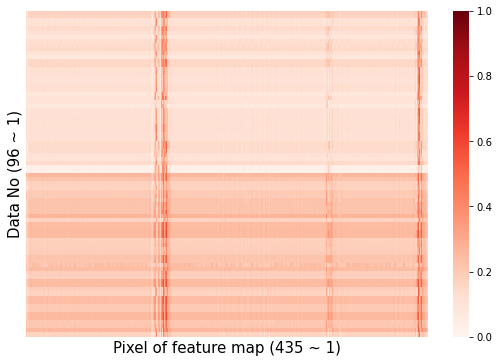

In [62]:
SG_D  = 2
Cycle = 180

exec("Grad_CAMs_inv = grad_CAMs_ATR_%dD_%dc_avg_inv"%(SG_D, Cycle))

plt.figure(figsize=(9,6))

ax1 = sns.heatmap(Grad_CAMs_inv, annot=False, cmap='Reds', linecolor='white',
                 vmin=0, vmax=1, xticklabels=False, yticklabels=False)

# ax.set_title('[ATR] Grad CAM - 0 cycle', fontsize=20)
ax1.set_ylabel('Data No (96 ~ 1)', fontsize=15)
ax1.set_xlabel('Pixel of feature map (435 ~ 1)', fontsize=15)

plt.savefig('Grad_CAM/ATR/[ATR, SG-%dD] %d cycle.png'%(SG_D, Cycle))
plt.show()

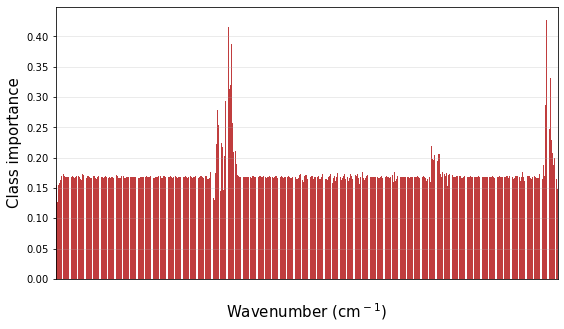

In [63]:
exec("Grad_CAMs = grad_CAMs_ATR_%dD_%dc_avg"%(SG_D, Cycle))
mean_contribution = Grad_CAMs.mean(axis=0)

wavenumber = np.arange(648, 4000, 7.71)

plt.figure(figsize=(9,5))

ax = sns.barplot(x=wavenumber, y=mean_contribution, color='tab:red')
plt.xlabel('\nWavenumber (cm$^-$$^1$)', fontsize=15)
plt.ylabel('Class importance', fontsize=15)
plt.xticks(ticks=[]) 
plt.gca().invert_xaxis()
# plt.ylim([-0.01, 0.82])
plt.grid(alpha=0.3)

plt.savefig('Grad_CAM/ATR/[ATR, SG-%dD] %d cycle -wavenumber.png'%(SG_D, Cycle))
plt.show()

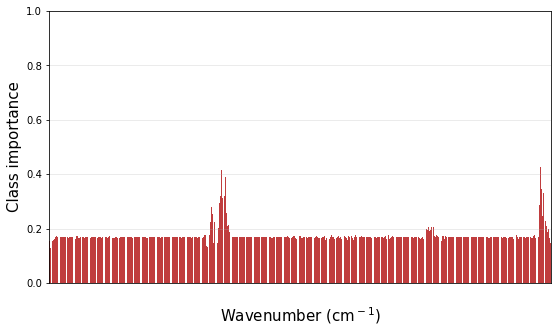

In [64]:
exec("Grad_CAMs = grad_CAMs_ATR_%dD_%dc_avg"%(SG_D, Cycle))
mean_contribution = Grad_CAMs.mean(axis=0)

wavenumber = np.arange(648, 4000, 7.71)

plt.figure(figsize=(9,5))

ax = sns.barplot(x=wavenumber, y=mean_contribution, color='tab:red')
plt.xlabel('\nWavenumber (cm$^-$$^1$)', fontsize=15)
plt.ylabel('Class importance', fontsize=15)
plt.xticks(ticks=[]) 
plt.gca().invert_xaxis()
plt.ylim([0, 1])
plt.grid(alpha=0.3)

plt.savefig('Grad_CAM/ATR/(Scaled)/[ATR, SG-%dD](Scaled) %d cycle -wavenumber.png'%(SG_D, Cycle))
plt.show()

.

.

.

.

.

.

.

.

.

# Grad CAM 함수 세부검토

In [ ]:
pd.set_option('display.max_rows',    500)      # DataFrame 데이터 확인 시 최대 표시 행 수
pd.set_option('display.max_columns', 100)      # DataFrame 데이터 확인 시 최대 표시 열 수

In [ ]:
pd.DataFrame(grad_CAMs_ATR_0D_0c_avg)

#### 데이터 지정

In [ ]:
SG_D  = 0
idx   = 10

exec("sample = ATR_SG_%dD[%d]"%(SG_D, idx))
sample = sample.reshape(1, sample.shape[0], sample.shape[1])
sample

#### 함수 파라미터 지정

In [ ]:
data                 = sample
model                = model_ATR_0D_6
last_conv_layer_name = last_conv_layer_0D_6
pred_index           = None

#### grad_model : 입력값에 대한 지정레이어까지의 출력값 및 모델 예측값 출력

First, we create a model that maps the input image to the activations of the last conv layer as well as the output predictions

In [ ]:
grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
grad_model.summary()

In [ ]:
grad_model.layers[-1].activation = tf.keras.activations.linear

#### class_channel : 입력값에 대한 모델이 분류한 클래스의 스코어

Then, we compute the gradient of the top predicted class for our input image with respect to the activations of the last conv layer

In [ ]:
with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(data)
    if pred_index is None:
        pred_index = tf.argmax(preds[0])
    class_channel = preds[:, pred_index]
#     if class_channel.numpy()[0] == 1:
#         class_channel = class_channel-0.000001
    
class_channel

#### grads : GradientTape 통해 마지막 컨볼루션 레이어 feature map들의 각 요소들로부터 분류 클래스 사이의 weight 계산

This is the gradient of the output neuron (top predicted or chosen) with regard to the output feature map of the last conv layer

In [ ]:
grads = tape.gradient(class_channel, last_conv_layer_output)
print(grads.numpy().shape)
# grads.numpy()

#### pooled_grads : 각 feature map 별 weight 평균
This is a vector where each entry is the mean intensity of the gradient over a specific feature map channel

In [ ]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
print(pooled_grads.numpy().shape)
# pooled_grads.numpy()

#### last_conv_layer_output : 마지막 컨볼루션 레이어의 feature maps
We multiply each channel in the feature map array by "how important this channel is" with regard to the top predicted class,
then sum all the channels to obtain the heatmap class activation

In [ ]:
last_conv_layer_output = last_conv_layer_output[0]
print(last_conv_layer_output.numpy().shape)
# last_conv_layer_output.numpy()

#### last_conv_layer_output 및 pooled_grads 행렬곱

In [ ]:
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
print(heatmap.numpy().shape)
heatmap.numpy()

#### tf.squeeze : 1개 요소 가진 배열 차원 제거

In [ ]:
heatmap = tf.squeeze(heatmap)
print(heatmap.numpy().shape)
heatmap.numpy()

#### ReLU (0보다 작은 weight 제거) 및 스케일링 (최대값으로 나눠 0~1 min-Max)
For visualization purpose, we will also normalize the heatmap between 0 & 1

In [ ]:
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
print(heatmap.numpy().shape)
heatmap.numpy()